<!--NAVIGATION-->
< [简单的折线图](04.01-Simple-Line-Plots.ipynb) | [目录](Index.ipynb) | [误差可视化](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Simple Scatter Plots

# 簡單散點圖

> Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

另一種常用的圖表類型是簡單散點圖，它是折線圖的近親。不像折線圖，圖中的點連接起來組成連線，散點圖中的點都是獨立分佈的點狀、圓圈或其他形狀。本節開始我們也是首先將需要用到的圖表工具和函數導入到notebook中：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

## 使用 `plt.plot` 繪製散點圖

> In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

在上一節中，我們介紹了`plt.plot`/`ax.plot`方法繪製折線圖。這兩個方法也可以同樣用來繪製散點圖：

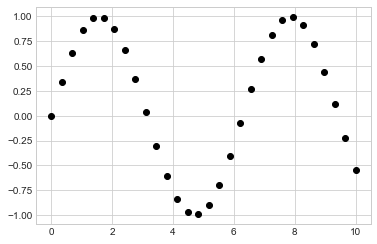

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

> The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

傳遞給函數的第三個參數是使用一個字符代表的圖表繪製點的類型。就像你可以使用`'-'`或`'--'`來控制線條的風格那樣，點的類型風格也可以使用短字符串代碼來表示。所有可用的符號可以通過`plt.plot`文檔或Matplotlib在線文檔進行查閱。大多數的代碼都是非常直觀的，我們使用下面的例子可以展示那些最通用的符號：

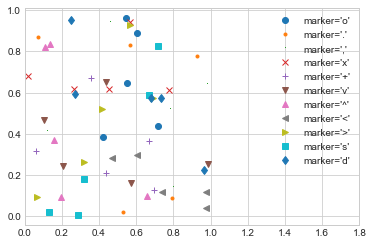

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

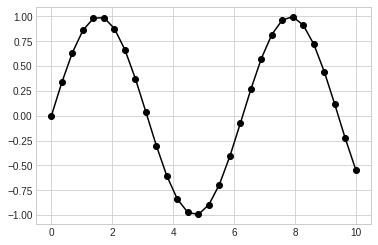

In [5]:
plt.plot(x, y, '-ok');

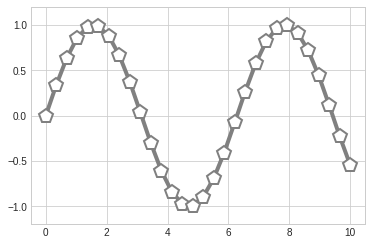

In [6]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with ``plt.scatter``

## 使用`plt.scatter`繪製散點圖

> A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

第二種更強大的繪製散點圖的方法是使用`plt.scatter`函數，它的使用方法和`plt.plot`類似：

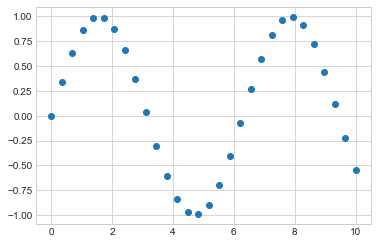

In [4]:
plt.scatter(x, y, marker='o');

> The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

`plt.scatter`和`plt.plot`的主要區別在於，`plt.scatter`可以針對每個點設置不同屬性（大小、填充顏色、邊緣顏色等），還可以通過數據集合對這些屬性進行設置。

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_3471/254898620.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();  # 显示颜色对比条


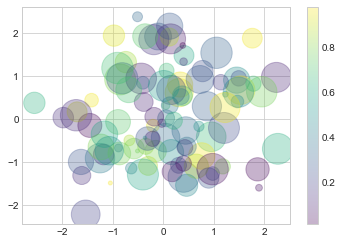

In [5]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # 显示颜色对比条

> Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

注意圖表右邊有一個顏色對比條（這里通過`colormap()`函數輸出），圖表中的點大小的單位是像素。使用這種方法，散點的顏色和大小都能用來展示數據信息，在希望展示多個維度數據集合的情況下很直觀。

> For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

例如，當我們使用Scikit-learn中的鳶尾花數據集，裡面的每個樣本都是三種鳶尾花中的其中一種，並帶有仔細測量的花瓣和花萼的尺寸數據：

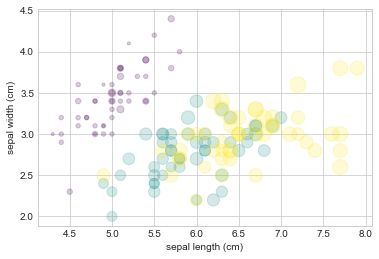

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

> We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

我們可以從上圖中看出，可以通過散點圖同時展示該數據集的四個不同維度：圖中的(x, y)位置代表每個樣本的花萼的長度和寬度，散點的大小代表每個樣本的花瓣的寬度，而散點的顏色代表一種特定的鳶尾花類型。如上圖的多種顏色和多種屬性的散點圖對於我們分析和展示數據集時都非常有幫助。

## ``plot`` Versus ``scatter``: A Note on Efficiency

## `plot` 和 `scatter` 對比：性能提醒

> Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

除了上面說的`plt.plot`和`plt.scatter`對於每個散點不同屬性的支持不同之外，還有別的因素影響對這兩個函數的選擇嗎？對於小的數據集來說，兩者並無差別，當數據集增長到幾千個點時，`plt.plot`會明顯比`plt.scatter`的性能要高。造成這個差異的原因是`plt.scatter`支持每個點使用不同的大小和顏色，因此渲染每個點時需要完成更多額外的工作。而`plt.plot`來說，每個點都是簡單的複制另一個點產生，因此對於整個數據集來說，確定每個點的展示屬性的工作僅需要進行一次即可。對於很大的數據集來說，這個差異會導致兩者性能的巨大區別，因此，對於大數據集應該優先使用`plt.plot`函數。

# Density and Contour Plots

# 密度和輪廓圖

> Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

有些情況下，我們需要在二維圖表中使用輪廓或顏色區域來展示三維的數據（可以設想等高線地圖或溫度分佈圖）。 Matplotlib提供了三個有用的函數來處理這項任務：`plt.contour`繪製輪廓圖，`plt.contourf`來繪製填充區域顏色的圖表以及`plt.imshow`來展示圖像。本節會介紹幾個使用它們的例子。當然我們還是首先從將需要使用的包導入notebook和初始化工作開始：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

## 三維可視化函數

> We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

我們首先使用一個簡單的函數$z = f(x, y)$繪製一個輪廓圖來進行說明，下面的這個函數我們在[在數組上計算：廣播](02.05-Computation-on-arrays-broadcasting.ipynb)一節中已經見過，那裡我們用來作為數組廣播運算的例子：

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

> A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

輪廓圖可以使用`plt.contour`函數進行創建。它接收三個參數：*x*參數代表三維網格的平面橫軸坐標，*y*參數代表三維網格的平面縱軸坐標，而*z*參數代表三維網格的高度坐標。最容易用來準備這種網格數據的是`np.meshgrid`函數，可以將兩個一維的數組構造成一個二維的網格：

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

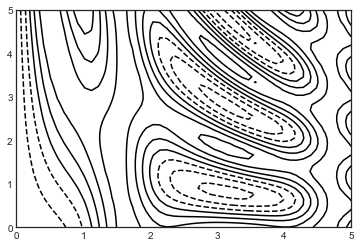

In [4]:
plt.contour(X, Y, Z, colors='black');

> Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

圖中值得注意的是，當使用單色繪製輪廓圖時，虛線代表的是負數的數值，而實線代表的是正數。而輪廓線可以通過指定`cmap`參數來設置線條的色圖。下例中展示了使用色圖且繪製了更多的輪廓線的例子，會在整個數據范圍區域內等距分佈有20條輪廓線：

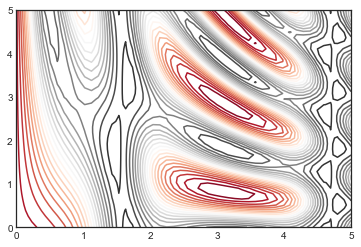

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

> Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:

上例中我们选择了`RdGy`（*Red-Gray*的缩写）色图，这对于聚集的数据来说是一个不错的选择。Matplotlib有大量的颜色图可供使用，你可以通过在IPython中对`plt.cm`模块使用TAB自动补全方法就可以看到：

```
plt.cm.<TAB>
```

> Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

上面的图看起来比第一幅图好多了，但是线条之间的空隙还是有点让人混淆。我们可以将上面的图改为填充轮廓图来解决这个问题，使用`plt.contourf()`函数（注意函数名最后有个f，代表填充fill），这个函数的语法基本上与`plt.contour()`保持一致。

> Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

并且我们加上了`plt.colorbar()`函数，这个函数会在图表边上创建一个颜色图例用以展示颜色所表示的数值区域：

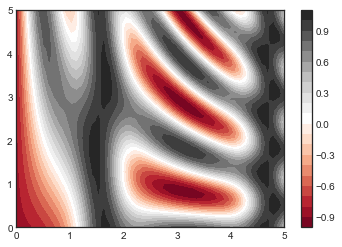

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

> The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

有了图例，很容易可以看出黑色区域代表着“峰”，而红色区域代表这“谷”。

> One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

上图有一个缺点，那就是图中颜色的阶梯是离散的而不是连续的，这通常不是我们想要的。我们可以通过设置很高的轮廓线数量来改善，但是这会导致绘制图表的性能降低：Matplotlib必须在每个颜色阶梯上绘制一条新的轮廓多边形。更好的办法是使用`plt.imshow()`函数，它会将一个二维的网格图表转换为一张图像。

> The following code shows this:

下面的例子展示了该方法：

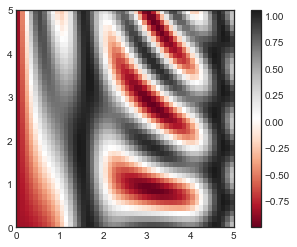

In [10]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy')
plt.colorbar();

> Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

最後，有時可能需要將輪廓圖和圖像結合起來。例如，下例中我們使用了半透明的背景圖像（通過`alpha`參數設置透明度），然後在背景圖層之上繪製了輪廓圖，並帶有每個輪廓的數值標籤（使用`plt.clabel()`函數繪製標籤）：

- `plt.imshow()`不接受x和y網格值作為參數，因此你需要手動指定*extent*參數[*xmin*, *xmax*, *ymin*, *ymax*]來設置圖表的數據范圍。
- `plt.imshow()`使用的是默認的圖像坐標，即左上角坐標點是原點，而不是通常圖表的左下角坐標點。這可以通過設置`origin`參數來設置。
- `plt.imshow()`會自動根據輸入數據調整坐標軸的比例；這可以通過參數來設置，例如，`plt.axis(aspect='image')`能讓x和y軸的單位一致。

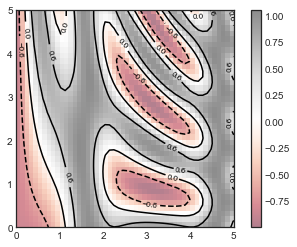

In [9]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

> The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).

通過組合使用`plt.contour`、`plt.contourf`和`plt.imshow`這三個函數，基本可以滿足我們繪製所有這種在二維圖標上的三維數據的需求。需要了解更多函數的參數信息，參考它們的文檔字符串。如果你對於使用三維圖表展示這種數據感興趣，參見[在matplotlib中創建三維圖表](04.12-Three-Dimensional-Plotting.ipynb)。

<!--NAVIGATION-->
< [简单的折线图](04.01-Simple-Line-Plots.ipynb) | [目录](Index.ipynb) | [误差可视化](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
